In [1]:
import numpy as np

# Exercises

For the exams, prepare 2 of these exercises. Pick the ones you like the most.

Some  of these come from / are inspired from https://github.com/rougier/numpy-100 and http://www.scipy-lectures.org/intro/numpy/exercises.html

## Q1: Fun with arrays

**A.**  Create the array: 
```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```
with out explicitly typing it in.

Now create a new array containing only its 2nd and 4th rows.


**B.** Create a 2d array with `1` on the border and `0` on the inside, e.g., like:
```
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
```

Do this using array slice notation to let it work for an arbitrary-sized array

#### A

In [2]:
a = np.arange(1,16).reshape((5,3), order='F') # order C, F or A

a

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

In [3]:
new_a = a[1::2]

new_a

array([[ 2,  7, 12],
       [ 4,  9, 14]])

#### B

In [4]:
a = np.ones((4,5))
a[1:-1,1:-1] = 0
a

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

## Q2: Histograms

Here we will read in columns of numbers from a file and create a histogram, using NumPy routines.  Make sure you have the data file
"`sample.txt`" in the same directory as this notebook (you can download it from  https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt

  * Use `np.loadtxt()` to read this file in.  

  * Next, use `np.histogram()` to create a histogram array.  The output returns both the count and an array of edges.
  
  * Finally, loop over the bins and print out the bin center (averaging the left and right edges of the bin) and the count for that bin.

In [5]:
a = np.loadtxt('sample.txt')
print(a.shape)
counts, bins = np.histogram(a)

(100, 2)


In [6]:
import time

In [7]:
# using list comprehension
t0 = time.time()
centered_bins = np.array([(bins[i+1]+bins[i])/2 for i in range(len(bins)-1)])
t1 = time.time()
print(t1-t0)

bins, centered_bins, counts

8.726119995117188e-05


(array([-30.58842789, -17.6295851 ,  -4.67074231,   8.28810048,
         21.24694327,  34.20578606,  47.16462884,  60.12347163,
         73.08231442,  86.04115721,  99.        ]),
 array([-24.10900649, -11.1501637 ,   1.80867908,  14.76752187,
         27.72636466,  40.68520745,  53.64405024,  66.60289303,
         79.56173582,  92.52057861]),
 array([ 6, 23, 52, 37, 16, 14, 13, 13, 13, 13]))

In [8]:
# using slicing
t0 = time.time()
centered_bins = (bins[1:]+bins[:-1])/2
t1 = time.time()
print(t1-t0)


bins, centered_bins, counts

0.00010037422180175781


(array([-30.58842789, -17.6295851 ,  -4.67074231,   8.28810048,
         21.24694327,  34.20578606,  47.16462884,  60.12347163,
         73.08231442,  86.04115721,  99.        ]),
 array([-24.10900649, -11.1501637 ,   1.80867908,  14.76752187,
         27.72636466,  40.68520745,  53.64405024,  66.60289303,
         79.56173582,  92.52057861]),
 array([ 6, 23, 52, 37, 16, 14, 13, 13, 13, 13]))

## Q3: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

In [49]:
def mystd(array):
    N_inv = 1/len(array) # division is very costly, better do it once
    err = a - a.sum()*N_inv
    sum_err = (err*err).sum()*N_inv
    return np.sqrt(sum_err)

def compare_stdevs(initial_size, final_size):

    history = []#["mystd", "numpy"]
    for size in np.arange(initial_size, final_size):
    
        a = np.random.rand(10**size)

        t0 = time.time()
        mystdev = mystd(a)
        t1 = time.time()
        npstdev = np.std(a)
        t2 = time.time()

        history.append([t1-t0, t2-t1])
    return history

In [54]:
max = 9
history = []
for _ in range(100):
    history.append(compare_stdevs(1, max))

In [55]:
h_mean = np.array(history[1:]).mean(axis=0)
h_std = np.array(history[1:]).std(axis=0)
print(h_mean)

[[5.51517564e-05 5.89953529e-05]
 [1.06108309e-05 1.97911503e-05]
 [9.24775095e-06 1.86496311e-05]
 [9.13215406e-06 2.98023224e-05]
 [1.27879056e-05 1.45880863e-04]
 [4.97162944e-05 3.57049162e-03]
 [7.19205298e-05 3.19615301e-02]
 [7.46587310e-05 3.01523546e-01]]


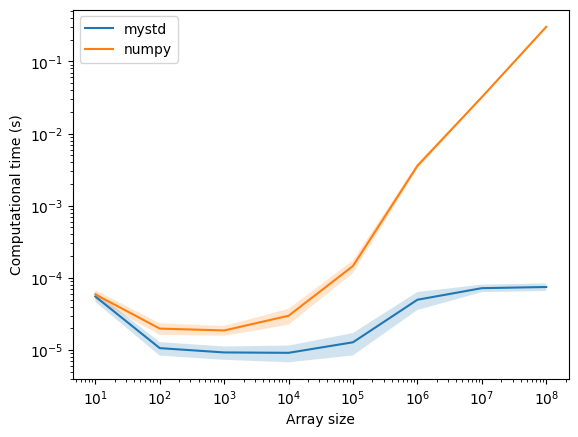

In [56]:
import matplotlib.pyplot as plt

x = np.arange(1,max)

plt.fill_between(x = 10**x, y1=h_mean[:,0]-h_std[:,0], y2=h_mean[:,0]+h_std[:,0], alpha=0.2)
plt.fill_between(x = 10**x, y1=h_mean[:,1]-h_std[:,1], y2=h_mean[:,1]+h_std[:,1], alpha=0.2)

plt.loglog(10**x, h_mean, label=["mystd", "numpy"])

plt.ylabel("Computational time (s)")
plt.xlabel("Array size")

plt.legend()
plt.show()

Let's double check

In [57]:
%timeit np.std(a)

11.3 µs ± 161 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [58]:
%timeit mystd(a)

5.16 µs ± 110 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
